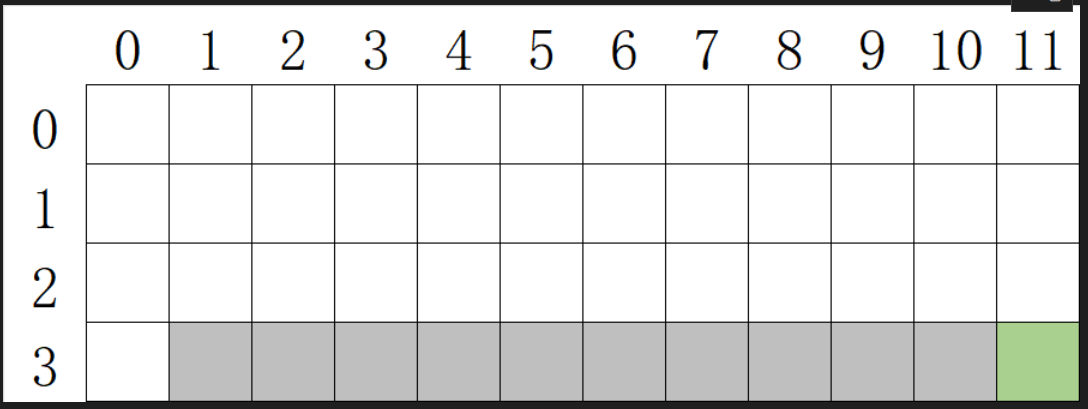

In [26]:
from enum import Enum



class State(Enum):
    Unknown = -1
    Ground = 0
    Terminal = 1
    Trap = 2


def get_state(position: tuple):
    if position[0] < 0 or position[0] > 11 or position[1] < 0 or position[1] > 3:
        return State.Unknown

    if position[1] < 3:
        return State.Ground
    elif position[0] == 0 and position[1] == 0:
        return State.Ground
    elif position[0] == 11 and position[1] == 3:
        return State.Terminal
    else:
        return State.Trap

In [27]:
class Action(Enum):
    Up = 0
    Right = 1
    Down = 2
    Left = 3


def interact(pos, act: Action):
    if act == Action.Up:
        next_pos = (pos[0], pos[1]-1)
    elif act == Action.Right:
        next_pos = (pos[0]+1, pos[1])
    elif act == Action.Down:
        next_pos = (pos[0], pos[1]+1)
    elif act == Action.Left:
        next_pos = (pos[0]-1, pos[1])
    else:
        print("error action type")

    s = get_state(next_pos)
    reward = 0
    if s == State.Unknown:
        next_pos = pos
        reward = -1
    elif s == State.Ground:
        reward = -1
    elif s == State.Trap:
        reward = -100
    elif s == State.Terminal:
        reward = 0
    else:
        print("error state")
    return next_pos, reward

In [28]:
import numpy as np

state_values = np.zeros((12, 4))
pi = np.ones([12, 4, 4])*0.25
action_set = [Action.Up, Action.Right, Action.Down, Action.Left]


NUM1 = 100
gamma = 0.9


def policy_evaluate():
    for _ in range(NUM1):
        for c in range(12):
            for r in range(4):
                pos = (c, r)
                a_prob = pi[c, r]
                value = 0.0
                for prob, act in zip(a_prob, action_set):
                    next_pos, reward = interact(pos, act)
                    value += prob*(reward+gamma*state_values[next_pos[0],next_pos[1]])
                state_values[c, r] = value
policy_evaluate()
print(state_values)

[[ -89.42261173 -123.05739254 -203.14826723 -247.48017166]
 [ -91.086775   -126.84903229 -214.75091515 -287.3588223 ]
 [ -93.02725112 -130.43395166 -222.64794736 -303.11596957]
 [ -94.46203018 -132.73777831 -226.80115348 -309.61490486]
 [ -95.15974382 -133.80410311 -228.560053   -312.08977286]
 [ -95.06187555 -133.78288451 -228.68298515 -312.35648322]
 [ -94.04827849 -132.59719078 -227.22495888 -310.677352  ]
 [ -91.84056158 -129.82028274 -223.48673483 -306.08499361]
 [ -88.02670832 -124.61010387 -215.69969835 -295.68422549]
 [ -82.30799835 -115.83155107 -200.43981834 -272.23875234]
 [ -75.20262558 -103.00452965 -172.62919182 -217.14277072]
 [ -69.27429517  -89.69009766 -132.20929033 -189.73493369]]
